## Weekly Exercise 6, Spencer K

#### Data Lemur problem

In [ ]:
# My very first thought is that the negatives make this a little more complicated
# Since we're picking 3 numbers, there's the possibility of grabbing 2 negatives to get a final
# product with a higher value. That's the only case where we grab negatives though because to
# grab 1 or 3 negatives to multiply would make the product negative
    # Since this is the only quirk I see, I think we can just add an "if" for the case that
    # grabbing two negatives gives us a greater final product

# pseudocode:
# grab the 3 highest numbers, x y z
# product = x*y*z
# check if there 2+ negative numbers in the list
    # grab the 2 lowest numbers and the highest
    # multiply them to make alt_product
    # if alt_product > product
        # product = alt_product
# return product


def max_three(listy):
    listy.sort()                                # may I be smote if this isn't a legal move
                                                # it's tree week and trees gotta be sorted right?

    x, y, z = listy[(len(listy)-3):]            # grabs the last 3 numbers from a sorted list
    product = x*y*z                             # multiplies them for a product

    if((listy[0] < 0) and (listy[1] < 0)):      # checks if there's at least 2 negatives in listy
        a, b = listy[:2]                        # grabs the lowest two negatives from sorted list
        alt_product = a*b*z                     # multiplies them by the greates positive in list
        if(alt_product > product):              # compares the alt_product to product
            product = alt_product               # if greater, we us the alt_product

    return product                              # return the greatest product

# TESTS
print(max_three([1,2,-9,-8,3,4,5,6,7,8]))
# DATA LEMUR'S TESTS
print(max_three([1, 2, 3, 4, 5]))
print(max_three([-4, -2, 3, 5]))
print(max_three([-5, 5, 2, 1]))

# I'm getting p frustrated with these websites not accepting working code
# above are all DataLemur's test cases, and this program gives correct output for each of them
# DataLemur says it throws a type error, but that's a steaming load of malarky

# It was literally just that I'd changed "input" to "listy"; The Lemur is a fricken square

576
60
40
10


#### LeetCode Problem: Balanced Binary Tree

In [ ]:
#Given a binary tree, determine if it is height-balanced

# so the trees are organized in an array like such
# [root, r-1, r-1, r-2, r-2, r-2, r-2] and so on with elements organized first by height and
#                                      then from left to right based on where they're at

#       examples from LeetCode: (spaced to represent layering)
#       [3   9,20   null,null,15,7]         True
# h=     2    1            0  
#       [1   2,2   3,3,null,null   4,4]     False
# h =    3    2         1           0
#       In this last one we can see that while height 1 still has nulls, height 0 has values
#       If this were balanced, I don't think that would be so
#       We'd fill want those hieght 1 slots filled in before putting anything lower
#           This problem is just to return a bool of whether the tree is height balanced or not
#           Phew, cause how we'd automate rebalancing isn't coming to me immediately
#       I think this is how I'm gonna check the 

# I think we first want to read elements from left to right and organize them into layers
# For simplicity, I'll refer to the root as A, the next down as B, etc
# first is A, next two B, next four C, and so on, doubling til the end of the list
# I if we make a list of list we can actually put everything in an index matching its height

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # I know it's silly but when I was reading the problem text I really thought the tree
    # could be interpretted as a list without using the nodes. So here's a method to read 
    # through a tree and convert it into the format that the checking method takes
    # it took waaaaay more time than my pretty little isBalanced did
    def listifyTree(root):
        if not root:    # if not root
            return []   # then who?
        # handles nodeless trees

        return_list = []                                        # a tree in a list formatted for isBalanced
        popping_block = [(root,0)]                              # a queue to pop tree nodes

        while popping_block:                                    # while there are nodes to pop
            node, distance = popping_block.pop(0)               # Grab the first item in the queue
            if node:                                            # if it's a node
                return_list.append(distance)                    # append it's distance to the return_list
                popping_block.append((node.left, distance+1))   # queue it's left child in the block
                popping_block.append((node.right, distance+1))  # queue it's right child in the block
            else:                                               # if he's not a node
                return_list.append(None)                        # then he must be a None; append him

        while return_list and return_list[-1] is None:          # If there's nodes, and it needs trimming
            return_list.pop()                                   # trim the None from the end of the list
        return return_list                                      # return the formatted list

    def isBalanced(self,root):
        root = Solution.listifyTree(root)                       # Format root to make this thing work
        layer_list = []                                         # a list that will represent the tree
        x = 1                                                   # start at one bc first layer is 1 element max length
        while len(root) > 0:                                    # While there are elements left in the tree
            layer_list.insert(0, root[:x])                      # insert the first x of them at the front of layer_list
            for i in range(x):                                  # then go through x elements of the tree 
                if len(root) != 0:                              # and if there are still elements
                    root.pop(0)                                 # pop em
            x = x*2                                             # Double x to get the next layer's width

        # next we'll look at height 1 in the list, and see if it's still got Nones in it despite height 0 being present
        if (len(layer_list)>1):                                 # if there's more than one layer (a parent and child at least)
            if (None in layer_list[1]):                         # if height 1 still has Nones in it
                    return False                                # Not balanced, return False
        return True                                             # Else, balanced, return True

    # I committed to my initial goofy misunderstanding because I was so pleased with this little method and the neat lil 
    # trees it was able to print from the LeetCode example trees represented as lists. Unfortunately, I spent all this
    # time sprucing it up and then LeetCode hit it with 228 test cases. It only failed 11, but I will probably have
    # restart this whole problem

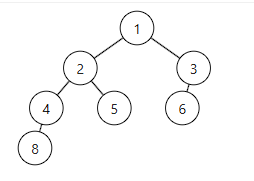

 The above program cleared 219/228 test cases. I don't know how to see the other 10 cases (aside from the one above) that didn't pass, but I'm surprised the above tree is balanced.

This has all been dumb and I probably should've just started with a node traversing thing that counts the height of all the nodes and then did the little arm height comparison or something boring like that, but dag-nabbit, I wanted the layered_list to work.

It's very late

In [ ]:
class Solution:                                                         # I should've done this hours ago x.x
   def height(node):                                                        # a recursive method to get node's height
            if not node:                                                    # if it's not a node
                return 0                                                    # it doesn't have a height
            return 1 + max(Solution.height(node.left),                      # return 1 + the greater of the 2 heights
                            Solution.height(node.right))                    # of the child nodes

   def isBalanced(self,node):                                               # a recursive method to get node's height
        if not node:                                                        # if it's not a node
            return True                                                     # call it balanced
        left_height = Solution.height(node.left)                            # grab the left arm height
        right_height = Solution.height(node.right)                          # grab the right arm height
        if abs(left_height - right_height) > 1:                             # check if the |difference| is more than 1
            return False                                                    # not balanced, return False
        return self.isBalanced(node.left) and self.isBalanced(node.right)   # recursively check the nodes below

In [ ]:
# testing for the fun thing that didn't work

listy = [1,2,2,3,3,None,None,4,4]
listy2=[1,2,2,3,3,"null","null",4,4]

# brainstormy/testing bramch
def isBalanced(root):
    
    layer_list = []
    x = 1

    while len(root) > 0:
        layer_list.insert(0, root[:x])
        for i in range(x):
            if len(root) != 0:
                root.pop(0)
        x = x*2

    # Test code
    for i in layer_list:
        print(i)

    if (None in layer_list[1]) or ('null' in layer_list[1]):
        return False
    return True


"""
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def listifyTree(root):
    if not root:    # if not root
        return []   # then who?
    return_list = []
    popping_block = [(root,0)]  # 
    while popping_block:
        node, distance = popping_block.pop(0)  # Grab the first item in the queue
        if node: return_list.append(distance)
        else: return_list.append(None)
        if node:
            popping_block.append((node.left, distance+1))
            popping_block.append((node.right, distance+1))
        while return_list and return_list[-1] is None:
            return_list.pop()
        return return_list
"""
print(isBalanced(listy))
print(isBalanced(listy2))


[4, 4]
[3, 3, None, None]
[2, 2]
[1]
False
[4, 4]
[3, 3, 'null', 'null']
[2, 2]
[1]
False
